# <font color=blue> 기계학습 기초 2/3장: 데이터와 데이터(분포)의 시각화

### 사용할 데이터: 
1.   Iris (150 x 4)

1.   Gene expression 데이터 (2306 x 200)
2.   Low quality digit images (1797 x 8 x 8)

### 위 세 개 데이터에 대해 다음의 3가지 방식으로 데이터를 시각화 해본다.

1.   Pair-wise scatter plot

1.   PCA (2개 주축만 사용하여 2차원으로 선형 투영)
2.   UMAP (2차원 비선형 맵핑)

### (참고 링크)

1.  PCA:  https://datascienceschool.net/view-notebook/f10aad8a34a4489697933f77c5d58e3a/
2.  UMAP:  https://umap-learn.readthedocs.io/en/latest/basic_usage.html



2019.08.17 단국대학교 윤 석현

### 먼저, 필요한 패키지 로드

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from matplotlib import cm

## Function to draw UMAP plot conveniently
def draw_scatter(pnt_2d, y, Title = None):
    C_map = cm.get_cmap('Spectral', 256)  # 'viridis'
    
    plt.figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')

    ## Under the original label
    plt.subplot(2,2,1)
    scatters = []      
    z = y
    y_label = list(set(z))
    nl = len(y_label)-1
    for k, lbl in enumerate(y_label):
        n = y_label[k]
        scatters.append(plt.scatter(pnt_2d[z==n, 0], pnt_2d[z==n, 1], \
                                    color=C_map(k/nl), # marker=markers[k], \
                                    label=lbl, s = 6))

    plt.legend( tuple(scatters),
                tuple(y_label),
                scatterpoints=1,
                loc='upper right',
                ncol=1, # len(scatters),                                                                                                 
                fontsize=10)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    if Title is not None: 
        plt.title(Title, fontsize=11)
    plt.grid()


# 1. iris 데이터

### (1) iris 데이터 로드

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 로드한 데이터 확인

In [4]:
print(iris.data.shape)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


### (2) 로드한 데이터를 data frame으로 포맷팅 (Pandas 패키지 사용) 

In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
# iris_df.to_csv('iris.csv') -> csv파일로 만들면 생략된 내용도 확인이 가능함

#### 변환된 데이터 확인

In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### (3) Pair-wise scatter plot (seaborn 패키지 사용)

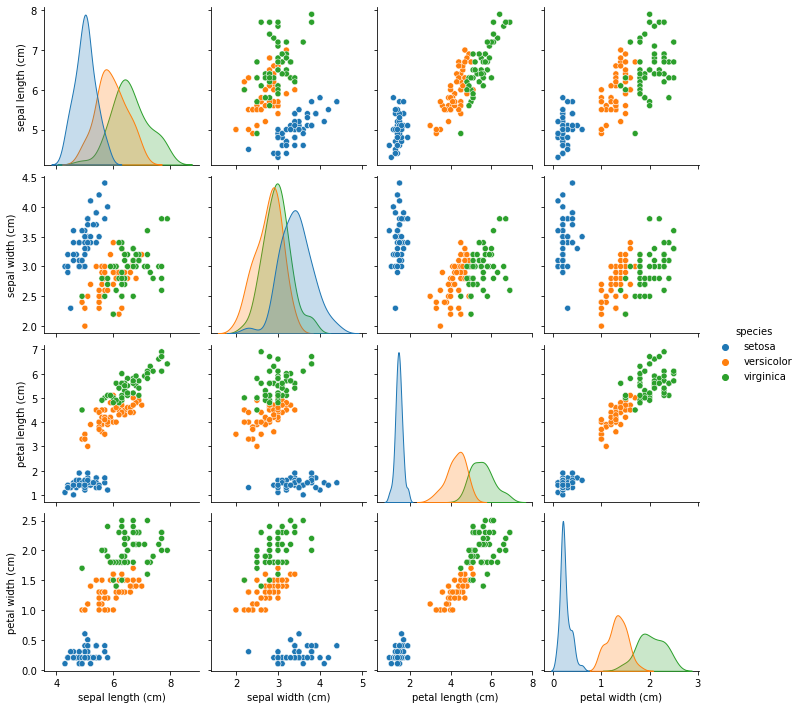

In [7]:
sb.pairplot(iris_df, hue='species'); # species라는 컬럼을 기준으로 구분하여 그림을 그려줌

### (4) PCA를 적용하여 2차원 축소한 후 데이터 분포 시각화 

(150, 4) (150, 2)


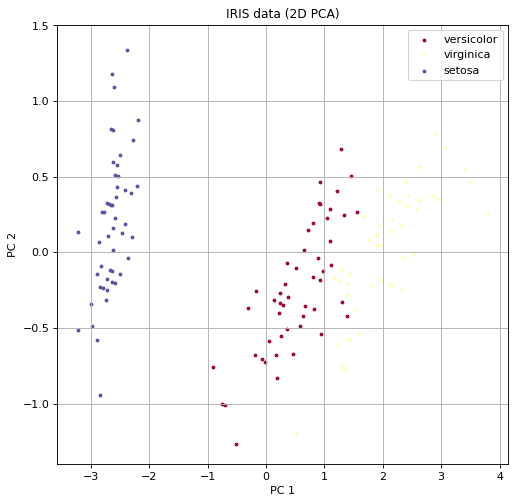

In [8]:
## create PCA object
pca_2d = PCA(n_components=2)

## get 2d projection of feature vectors
X = iris_df.iloc[:,:4]
X_2d = pca_2d.fit_transform(X)
print(X.shape, X_2d.shape)

y = iris.target_names[iris.target] # y = iris_df.loc[:, 'species']

draw_scatter( X_2d, y, 'IRIS data (2D PCA)' )

In [9]:
## check projection matrix
pca_2d.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

### Note: X_2d = pca_2d.components_ * X

# 2. Gene expression 데이터

### (0) 데이터 파일 업로드 (Google Colab 사용시 서버에 업로드)

In [10]:
# from google.colab import files
# files.upload()

In [11]:
# !rm gene*

### (1) 데이터 불러오기

In [12]:
file_name = 'cancer_gene_exp.csv'
## 1st (0th) row: Gene name
## 1st (0th) col: Sample (patient) name
## 2nd (1th) col: Tumor type (target value)
## 3rd (2th) col to the end: Gene expressions

## read data
df = pd.read_csv(file_name, index_col=0)
print("Data shape: ",end='')
print(df.shape)

df

Data shape: (1655, 101)


,Tumor_type,PSMB11|122706,PAX1|5075,DNTT|1791,C14orf23|387978,CCL25|6370,IGLL1|3543,ARL5C|390790,ST8SIA3|51046,RAG2|5897,...,C10orf129|142827,SFTPA1|653509,TCERG1L|256536,LOC730811|730811,TFAP2B|7021,PCSK2|5126,KCNQ2|3785,C7orf16|10842,PABPC1L2B|645974,GALR1|2587
TCGA-2W-A8YY,CESC,0.00,4.37,0.00,0.78,0.44,0.00,0.00,1.28,0.00,...,0.00,0.00,1.05,0.0,2.67,1.05,1.05,0.44,0.44,0.00
TCGA-4J-AA1J,CESC,0.00,0.00,0.89,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.51,0.00,0.0,1.83,0.89,0.00,0.00,0.00,0.89
TCGA-BI-A0VR,CESC,0.00,0.00,0.00,0.00,2.18,2.30,0.00,0.00,0.00,...,0.48,0.48,0.00,0.0,3.08,0.48,0.00,0.00,0.00,0.00
TCGA-BI-A0VS,CESC,0.00,0.00,0.00,0.00,0.43,1.62,0.43,0.00,0.76,...,0.00,2.04,1.25,0.0,1.44,2.04,0.43,0.00,0.00,0.43
TCGA-BI-A20A,CESC,0.00,0.00,0.73,0.00,1.73,0.41,0.00,0.00,0.00,...,0.00,0.00,0.41,0.0,0.41,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-QS-A8F1,UCEC,0.00,0.00,0.00,2.05,4.62,0.00,0.00,2.52,0.00,...,0.00,1.36,3.15,0.0,0.00,3.38,3.38,4.19,0.00,2.52
TCGA-SJ-A6ZI,UCEC,0.00,0.00,0.00,0.95,2.14,0.70,0.00,1.35,0.39,...,0.00,0.39,1.17,0.0,1.17,0.39,0.70,0.39,0.00,0.00
TCGA-SJ-A6ZJ,UCEC,1.21,0.00,0.53,0.00,3.78,0.53,0.00,0.53,0.00,...,0.00,0.00,2.31,0.0,0.91,0.53,1.68,0.53,0.00,0.00
TCGA-SL-A6J9,UCEC,0.77,1.04,0.77,0.77,7.47,0.00,0.00,0.00,0.00,...,0.00,0.00,0.77,0.0,0.00,2.05,0.43,0.00,0.00,0.00


In [13]:
## Set feature vector and target values
X = df.iloc[:,1:] 
y = df.Tumor_type ## df.loc[:,0]
target_names = list(set(y))

print('Tumor types: ', target_names)

Tumor types:  ['UCEC', 'COAD', 'PCPG', 'THYM', 'LUAD', 'CESC', 'ESCA', 'SARC', 'THCA']


In [14]:
X

,PSMB11|122706,PAX1|5075,DNTT|1791,C14orf23|387978,CCL25|6370,IGLL1|3543,ARL5C|390790,ST8SIA3|51046,RAG2|5897,ARPP21|10777,...,C10orf129|142827,SFTPA1|653509,TCERG1L|256536,LOC730811|730811,TFAP2B|7021,PCSK2|5126,KCNQ2|3785,C7orf16|10842,PABPC1L2B|645974,GALR1|2587
TCGA-2W-A8YY,0.00,4.37,0.00,0.78,0.44,0.00,0.00,1.28,0.00,1.28,...,0.00,0.00,1.05,0.0,2.67,1.05,1.05,0.44,0.44,0.00
TCGA-4J-AA1J,0.00,0.00,0.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.51,0.00,0.0,1.83,0.89,0.00,0.00,0.00,0.89
TCGA-BI-A0VR,0.00,0.00,0.00,0.00,2.18,2.30,0.00,0.00,0.00,0.00,...,0.48,0.48,0.00,0.0,3.08,0.48,0.00,0.00,0.00,0.00
TCGA-BI-A0VS,0.00,0.00,0.00,0.00,0.43,1.62,0.43,0.00,0.76,0.00,...,0.00,2.04,1.25,0.0,1.44,2.04,0.43,0.00,0.00,0.43
TCGA-BI-A20A,0.00,0.00,0.73,0.00,1.73,0.41,0.00,0.00,0.00,0.00,...,0.00,0.00,0.41,0.0,0.41,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-QS-A8F1,0.00,0.00,0.00,2.05,4.62,0.00,0.00,2.52,0.00,3.15,...,0.00,1.36,3.15,0.0,0.00,3.38,3.38,4.19,0.00,2.52
TCGA-SJ-A6ZI,0.00,0.00,0.00,0.95,2.14,0.70,0.00,1.35,0.39,0.70,...,0.00,0.39,1.17,0.0,1.17,0.39,0.70,0.39,0.00,0.00
TCGA-SJ-A6ZJ,1.21,0.00,0.53,0.00,3.78,0.53,0.00,0.53,0.00,0.00,...,0.00,0.00,2.31,0.0,0.91,0.53,1.68,0.53,0.00,0.00
TCGA-SL-A6J9,0.77,1.04,0.77,0.77,7.47,0.00,0.00,0.00,0.00,1.04,...,0.00,0.00,0.77,0.0,0.00,2.05,0.43,0.00,0.00,0.00


### (2) PCA를 적용하여 2차원 축소한 후 데이터 분포 시각화

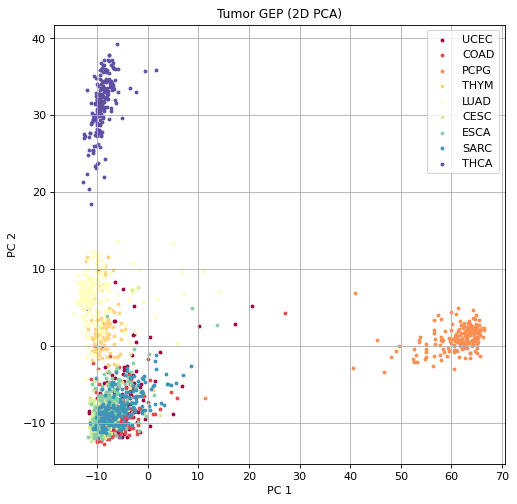

In [15]:
X_2d_pca = pca_2d.fit_transform(X)

draw_scatter( X_2d_pca, y, 'Tumor GEP (2D PCA)' )

In [16]:
pca_2d.components_.shape

(2, 100)

### (3) tSNE(비선형 차원축소, 교재 12장)을 이용한 데이터 시각화

(1655, 100) (1655, 2)


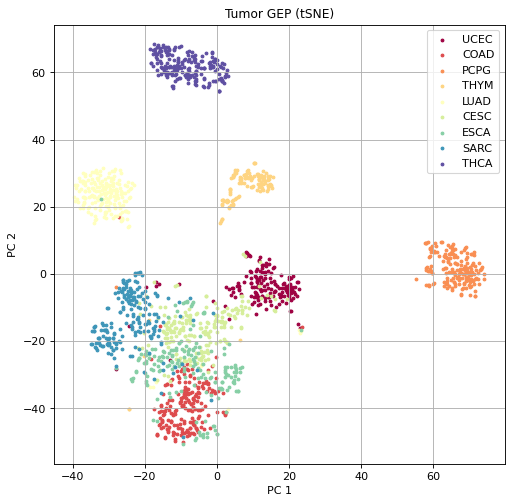

In [17]:
# 2단계로도 가능
# tsne_obj = TSNE(learning_rate=300, init="pca")
# X_2d_tsne = tsne_obj.fit_transform(X)

X_2d_tsne = TSNE(learning_rate=300, init='pca').fit_transform(X)
print(X.shape, X_2d_tsne.shape)

draw_scatter( X_2d_tsne, y, 'Tumor GEP (tSNE)' )

# 3. Digits 데이터

### (1) 데이터 로드

In [18]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### (2) 불러온 데이터 확인

In [19]:
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)
digits.target_names

(1797, 64)
(1797, 8, 8)
(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

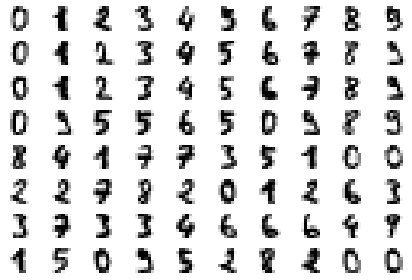

In [20]:
## Check images
fig, ax_array = plt.subplots(8, 10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
    
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=1, w_pad=1)

In [21]:
## Set feature vector and target values
X = digits.data 
y = digits.target
target_names = list(set(y))

print('Target names: ', target_names)

Target names:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### (3) PCA를 적용하여 2차원 축소한 후 데이터 분포 시각화

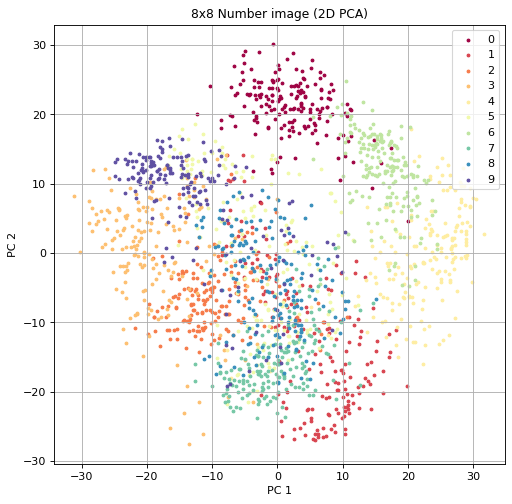

In [22]:
pca_2d = PCA(n_components=2)

X_2d_pca = pca_2d.fit_transform(X)

draw_scatter( X_2d_pca, y, '8x8 Number image (2D PCA)' )

### (4) UMAP을 이용한 데이터 시각화

(1797, 64) (1797, 2)


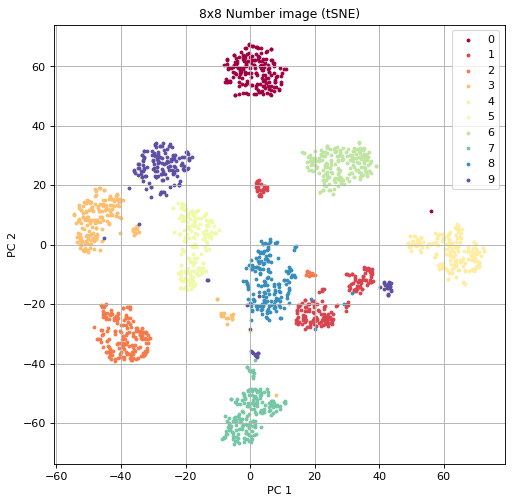

In [23]:
X_2d_tsne = TSNE(learning_rate=300, init='pca').fit_transform(X)
print(X.shape, X_2d_tsne.shape)

draw_scatter( X_2d_tsne, y, '8x8 Number image (tSNE)' )